# Shallow Lake Problem

Vivek Srikrishnan  
2023-05-13

In [3]:
using Pkg
Pkg.activate(dirname(@__DIR__))
Pkg.instantiate()

In [4]:
using Plots
using LaTeXStrings
using Distributions
using Random

## Introduction

Systems can exhibit complex, nonlinear dynamics, including (but not
limited to):

-   bifurcations;
-   reinforcing and dampening feedbacks; and
-   tipping points.

In this notebook, we’ll look at a simple model which has very complex
dynamics: the shallow lake problem introduced by Carpenter et al.
(1999).

## The Shallow Lake Problem

### Overview

Eutrophication is a common environmental problem in which plants and
algae feed on excess nutrients and become overabundant. The large mass
of plants and algae have several noxious effects on the ecosystem,
including:

-   hypoxia (reduction in oxygen from the decomposition of organic
    matter), leading to “dead zones”;
-   acidification (from the CO<sub>2</sub> produced by decomposition);
-   reduced sunlight (from an accumulation of surface algae);
-   clogged water intakes; and
-   reduction in recreational value and drinking water quality.

In lakes, eutrophication is often caused by excess input of nutrients
(particularly phosphorous, P), which can come from point sources (such
as industrial processes) and/or non-point sources (such as agricultural
runoff). As the P releases are related to economic activity, we can view
this (simplified) lake management problem from the perspective of a
tradeoff between economic benefits and the health of the lake: while
there are benefits to the activities which lead to P releases, there are
recreational, aesthetic, and ecological benefits to maintaining the lake
in a non-eutrophic (or *oligotrophic*) state.

### Model Formulation

Suppose we have a town which emits phosphorous into a lake as a
by-product of economic activity. The level of P in the lake at a given
time $t$ is given by $X_t$ (for the purposes of this problem, we will
just treat all values as dimensionless).

The level of controllable P release in year $t$ is $a_t$. The lake also
receives random levels of phosphorous from non-point source runoff,
which we denote by $y_t$. We model these random runoffs using a
[lognormal
distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)
$LogNormal(\mu, \sigma^2)$, which ensures that the runoffs cannot be
negative.

There is also some nutrient cycling in the lake which naturally reduces
phosphorous concentrations. This cycling is the result of accumulation
in the sediment and turnover (water motion disturbing the sediment and
carrying the nutrients upwards) and consumers, such as mussels. This
cycling is dependent on the state $X_t$, $\frac{X_t^q}{1 + X_t^q}$. The
lake also loses some of its P each time period of its due to outflows
and consumption, which we assume is linearly proportional to the state,
$bX_t$.

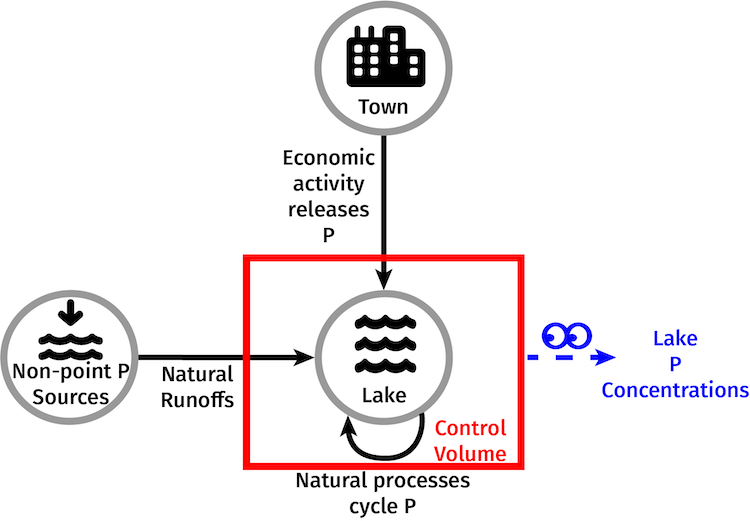

As a result, the lake dynamics are given by:

$$X_{t+1} = X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \quad y_t \sim LogNormal(\mu, \sigma^2),$$

where parameter interpretation is given in the table below.

| Parameter | Definition               | Units         |
|:---------:|:-------------------------|:--------------|
|   $X_t$   | P concentration in lake  | dimensionless |
|   $a_t$   | point source P input     | dimensionless |
|   $y_t$   | non-point source P input | dimensionless |
|    $q$    | P recycling rate         | dimensionless |
|    $b$    | rate at which P is lost  | dimensionless |

Lake problem parameters

## Lake Problem Dynamics

This analysis is adapted from Quinn et al. (2017).

First, let’s look at how the balance of P recycling and outflows affects
the accumulation of P in the lake absent additional inputs ($a=y=0$).

In [5]:
# define functions for lake recycling and outflows
lake_P_cycling(x, q) = x.^q ./ (1 .+ x.^q);
lake_P_out(x, b) = b .* x;

# define range of lake states X
x = 0:0.05:2.5;


In [6]:
# plot recycling and outflows for selected values of b and q
p1 = plot(x, lake_P_cycling(x, 2.5), color=:black, linewidth=5,legend=:topleft, label=:false, ylabel="P Flux", xlabel=L"$X_t$", tickfontsize=14, guidefontsize=16, legendfontsize=14, palette=:tol_muted, framestyle=:zerolines, grid=:false)
plot!(x, lake_P_out(x, 0.6), linewidth=3, linestyle=:dash, label=L"$b=0.6$")
plot!(x, lake_P_out(x, 0.4), linewidth=3, linestyle=:dash, label=L"$b=0.4$")
plot!(x, lake_P_out(x, 0.2), linewidth=3, linestyle=:dash, label=L"$b=0.2$")
quiver!([1], [0.35], quiver=([1], [0.4]), color=:red, linewidth=2)
quiver!([0.4], [0.19], quiver=([-0.125], [-0.05]), color=:red, linewidth=2)
quiver!([2.5], [0.97], quiver=([-0.125], [-0.05]), color=:red, linewidth=2)
plot!(ylims=(-0.02, 1))
plot!(size=(600, 600))


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip140)" d="M396.414 2142.57 Q390.095 2142.57 386.895 2148.81 Q383.735 2155 383.735 2167.48 Q383.735 2179.92 386.895 2186.16 Q390.095 2192.35 396.414 2192.35 Q402.774 2192.35 405.934 2186.16 Q409.134 2179.92 409.134 2167.48 Q409.134 2155 405.934 2148.81 Q402.774 2142.57 396.414 2142.57 M396.414 2136.09 Q406.582 2136.09 411.929 2144.15 Q417.317 2152.17 417.317 2167.48 Q417.317 2182.75 411.929 2190.81 Q406.582 2198.83 396.414 2198.83 Q386.246 2198.83 380.859 2190.81 Q375.512 2182.75 375.512 2167.48 Q375.512 2152.17 380.859 2144.15 Q386.246 2136.09 396.414 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M475.569 2142.57 Q469.249 2142.57 466.049 2148.81 Q462.89 2155 462.89 2167.48 Q462.89 2179.92 466.049 2186.16 Q469.249 2192.35 475.569 2192.35 Q481.929 2192.35 485.088 2186.16 Q488.289 2179.92 488.289 2167.48 Q488.289 2155 485.088 2148.81 Q481.929 2142.57 475.569 2142.57 M475.569 2136.09 Q485.737 2136.09 491.084 2144.15 Q496.472 2152.17 496.472 2167.48 Q496.472 2182.75 491.084 2190.81 Q485.737 2198.83 475.569 2198.83 Q465.401 2198.83 460.013 2190.81 Q454.666 2182.75 454.666 2167.48 Q454.666 2152.17 460.013 2144.15 Q465.401 2136.09 475.569 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip140)" d="M769.472 2142.57 Q763.153 2142.57 759.953 2148.81 Q756.793 2155 756.793 2167.48 Q756.793 2179.92 759.953 2186.16 Q763.153 2192.35 769.472 2192.35 Q775.832 2192.35 778.992 2186.16 Q782.192 2179.92 782.192 2167.48 Q782.192 2155 778.992 2148.81 Q775.832 2142.57 769.472 2142.57 M769.472 2136.09 Q779.64 2136.09 784.987 2144.15 Q790.375 2152.17 790.375 2167.48 Q790.375 2182.75 784.987 2190.81 Q779.64 2198.83 769.472 2198.83 Q759.305 2198.83 753.917 2190.81 Q748.57 2182.75 748.57 2167.48 Q748.57 2152.17 753.917 2144.15 Q759.305 2136.09 769.472 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M831.208 2137.18 L863.332 2137.18 L863.332 2144.07 L838.702 2144.07 L838.702 2158.89 Q840.485 2158.29 842.267 2158 Q844.05 2157.68 845.832 2157.68 Q855.959 2157.68 861.874 2163.23 Q867.788 2168.78 867.788 2178.26 Q867.788 2188.02 861.711 2193.45 Q855.635 2198.83 844.576 2198.83 Q840.768 2198.83 836.798 2198.19 Q832.869 2197.54 828.656 2196.24 L828.656 2188.02 Q832.302 2190 836.191 2190.98 Q840.08 2191.95 844.414 2191.95 Q851.422 2191.95 855.514 2188.26 Q859.605 2184.58 859.605 2178.26 Q859.605 2171.94 855.514 2168.25 Q851.422 2164.56 844.414 2164.56 Q841.133 2164.56 837.852 2165.29 Q834.611 2166.02 831.208 2167.56 L831.208 2137.18 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M1218.12 2142.57 Q1211.8 2142.57 1208.6 2148.81 Q1205.44 2155 1205.44 2167.48 Q1205.44 2179.92 1208.6 2186.16 Q1211.8 2192.35 1218.12 2192.35 Q1224.48 2192.35 1227.64 2186.16 Q1230.84 2179.92 1230.84 2167.48 Q1230.84 2155 1227.64 2148.81 Q1224.48 2142.57 1218.12 2142.57 M1218.12 2136.09 Q1228.29 2136.09 1233.64 2144.15 Q1239.02 2152.17 1239.02 2167.48 Q1239.02 2182.75 1233.64 2190.81 Q1228.29 2198.83 1218.12 2198.83 Q1207.95 2198.83 1202.56 2190.81 Q1197.22 2182.75 1197.22 2167.48 Q1197.22 2152.17 1202.56 2144.15 Q1207.95 2136.09 1218.12 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M1573.76 2137.18 L1605.88 2137.18 L1605.88 2144.07 L1581.25 2144.07 L1581.25 2158.89 Q1583.04 2158.29 1584.82 2158 Q1586.6 2157.68 1588.38 2157.68 Q1598.51 2157.68 1604.43 2163.23 Q1610.34 2168.78 1610.34 2178.26 Q1610.34 2188.02 1604.26 2193.45 Q1598.19 2198.83 1587.13 2198.83 Q1583.32 2198.83 1579.35 2198.19 Q1575.42 2197.54 1571.21 2196.24 L1571.21 2188.02 Q1574.85 2190 1578.74 2190.98 Q1582.63 2191.95 1586.97 2191.95 Q1593.97 2191.95 1598.07 2188.26 Q1602.16 2184.58 1602.16 2178.26 Q1602.16 2171.94 1598.07 2168.25 Q1593.97 2164.56 1586.97 2164.56 Q158

Based on <a href="#fig-lake-noinput" class="quarto-xref">Figure 1</a>,
we can see that there are typically three equilibria: a stable
equilibrium at $X=0$, an unstable, oligotrophic equilibrium $X_o$, and a
stable, eutrophic equilibrium $X_e$. When $X_t < X_o$, the lake tends
towards a zero P level without external inputs, while when $X_t > X_o$,
the lake will inevitably undergo eutrophication, as the P level will
tend towards $X_e$. This means that $X_t=X_o$ corresponds to a **tipping
point**: beyond that level, the lake will abruptly switch to a eutrophic
state from which it cannot recover.

This lake is subject to a **bifurcation** depending on the values of $b$
and $q$. To see this, let’s fix $q=2.5$, as in
<a href="#fig-lake-noinput" class="quarto-xref">Figure 1</a>. For
$b=0.4$, there are the two equilibria mentioned previously. However,
when $b=0.2$, there is only the unstable equilibrium $X=X_o$ in addition
to $X=0$. For $b=0.6$, the only equilibrium is $X=0$, so any positive P
input would result in eutrophication. This highlights the delicacy of
systems which exhibit bifurcations: whether an equilibrium is stable or
unstable, or even exists, can depend on a characteristic of the system
which is often highly uncertain.

In [7]:
eq = [0, 0.67, 2.2]
scatter!(p1, eq, (y -> lake_P_cycling(y, 2.5)).(eq), label="Equilibria", markersize=10, markercolor=:red)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip230)" d="M396.414 2142.57 Q390.095 2142.57 386.895 2148.81 Q383.735 2155 383.735 2167.48 Q383.735 2179.92 386.895 2186.16 Q390.095 2192.35 396.414 2192.35 Q402.774 2192.35 405.934 2186.16 Q409.134 2179.92 409.134 2167.48 Q409.134 2155 405.934 2148.81 Q402.774 2142.57 396.414 2142.57 M396.414 2136.09 Q406.582 2136.09 411.929 2144.15 Q417.317 2152.17 417.317 2167.48 Q417.317 2182.75 411.929 2190.81 Q406.582 2198.83 396.414 2198.83 Q386.246 2198.83 380.859 2190.81 Q375.512 2182.75 375.512 2167.48 Q375.512 2152.17 380.859 2144.15 Q386.246 2136.09 396.414 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip230)" d="M475.569 2142.57 Q469.249 2142.57 466.049 2148.81 Q462.89 2155 462.89 2167.48 Q462.89 2179.92 466.049 2186.16 Q469.249 2192.35 475.569 2192.35 Q481.929 2192.35 485.088 2186.16 Q488.289 2179.92 488.289 2167.48 Q488.289 2155 485.088 2148.81 Q481.929 2142.57 475.569 2142.57 M475.569 2136.09 Q485.737 2136.09 491.084 2144.15 Q496.472 2152.17 496.472 2167.48 Q496.472 2182.75 491.084 2190.81 Q485.737 2198.83 475.569 2198.83 Q465.401 2198.83 460.013 2190.81 Q454.666 2182.75 454.666 2167.48 Q454.666 2152.17 460.013 2144.15 Q465.401 2136.09 475.569 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip230)" d="M769.472 2142.57 Q763.153 2142.57 759.953 2148.81 Q756.793 2155 756.793 2167.48 Q756.793 2179.92 759.953 2186.16 Q763.153 2192.35 769.472 2192.35 Q775.832 2192.35 778.992 2186.16 Q782.192 2179.92 782.192 2167.48 Q782.192 2155 778.992 2148.81 Q775.832 2142.57 769.472 2142.57 M769.472 2136.09 Q779.64 2136.09 784.987 2144.15 Q790.375 2152.17 790.375 2167.48 Q790.375 2182.75 784.987 2190.81 Q779.64 2198.83 769.472 2198.83 Q759.305 2198.83 753.917 2190.81 Q748.57 2182.75 748.57 2167.48 Q748.57 2152.17 753.917 2144.15 Q759.305 2136.09 769.472 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip230)" d="M831.208 2137.18 L863.332 2137.18 L863.332 2144.07 L838.702 2144.07 L838.702 2158.89 Q840.485 2158.29 842.267 2158 Q844.05 2157.68 845.832 2157.68 Q855.959 2157.68 861.874 2163.23 Q867.788 2168.78 867.788 2178.26 Q867.788 2188.02 861.711 2193.45 Q855.635 2198.83 844.576 2198.83 Q840.768 2198.83 836.798 2198.19 Q832.869 2197.54 828.656 2196.24 L828.656 2188.02 Q832.302 2190 836.191 2190.98 Q840.08 2191.95 844.414 2191.95 Q851.422 2191.95 855.514 2188.26 Q859.605 2184.58 859.605 2178.26 Q859.605 2171.94 855.514 2168.25 Q851.422 2164.56 844.414 2164.56 Q841.133 2164.56 837.852 2165.29 Q834.611 2166.02 831.208 2167.56 L831.208 2137.18 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip230)" d="M1218.12 2142.57 Q1211.8 2142.57 1208.6 2148.81 Q1205.44 2155 1205.44 2167.48 Q1205.44 2179.92 1208.6 2186.16 Q1211.8 2192.35 1218.12 2192.35 Q1224.48 2192.35 1227.64 2186.16 Q1230.84 2179.92 1230.84 2167.48 Q1230.84 2155 1227.64 2148.81 Q1224.48 2142.57 1218.12 2142.57 M1218.12 2136.09 Q1228.29 2136.09 1233.64 2144.15 Q1239.02 2152.17 1239.02 2167.48 Q1239.02 2182.75 1233.64 2190.81 Q1228.29 2198.83 1218.12 2198.83 Q1207.95 2198.83 1202.56 2190.81 Q1197.22 2182.75 1197.22 2167.48 Q1197.22 2152.17 1202.56 2144.15 Q1207.95 2136.09 1218.12 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip230)" d="M1573.76 2137.18 L1605.88 2137.18 L1605.88 2144.07 L1581.25 2144.07 L1581.25 2158.89 Q1583.04 2158.29 1584.82 2158 Q1586.6 2157.68 1588.38 2157.68 Q1598.51 2157.68 1604.43 2163.23 Q1610.34 2168.78 1610.34 2178.26 Q1610.34 2188.02 1604.26 2193.45 Q1598.19 2198.83 1587.13 2198.83 Q1583.32 2198.83 1579.35 2198.19 Q1575.42 2197.54 1571.21 2196.24 L1571.21 2188.02 Q1574.85 2190 1578.74 2190.98 Q1582.63 2191.95 1586.97 2191.95 Q1593.97 2191.95 1598.07 2188.26 Q1602.16 2184.58 1602.16 2178.26 Q1602.16 2171.94 1598.07 2168.25 Q1593.97 2164.56 1586.97 2164.56 Q158

In [8]:
p2 = plot(x, 0.05 .+ lake_P_cycling(x, 2.5), color=:black, linewidth=5,legend=:topleft, label=:false, ylabel="P Flux", xlabel=L"$X_t$", tickfontsize=14, guidefontsize=16, legendfontsize=14, palette=:tol_muted, framestyle=:zerolines, grid=:false)
plot!(x, lake_P_out(x, 0.6), linewidth=3, linestyle=:dash, label=L"$b=0.6$")
plot!(x, lake_P_out(x, 0.4), linewidth=3, linestyle=:dash, label=L"$b=0.4$")
plot!(x, lake_P_out(x, 0.2), linewidth=3, linestyle=:dash, label=L"$b=0.2$")
plot!(size=(600, 600))


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip320)" d="M345.125 2142.57 Q338.805 2142.57 335.605 2148.81 Q332.445 2155 332.445 2167.48 Q332.445 2179.92 335.605 2186.16 Q338.805 2192.35 345.125 2192.35 Q351.485 2192.35 354.644 2186.16 Q357.845 2179.92 357.845 2167.48 Q357.845 2155 354.644 2148.81 Q351.485 2142.57 345.125 2142.57 M345.125 2136.09 Q355.293 2136.09 360.64 2144.15 Q366.027 2152.17 366.027 2167.48 Q366.027 2182.75 360.64 2190.81 Q355.293 2198.83 345.125 2198.83 Q334.957 2198.83 329.569 2190.81 Q324.222 2182.75 324.222 2167.48 Q324.222 2152.17 329.569 2144.15 Q334.957 2136.09 345.125 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip320)" d="M424.279 2142.57 Q417.96 2142.57 414.76 2148.81 Q411.6 2155 411.6 2167.48 Q411.6 2179.92 414.76 2186.16 Q417.96 2192.35 424.279 2192.35 Q430.639 2192.35 433.799 2186.16 Q436.999 2179.92 436.999 2167.48 Q436.999 2155 433.799 2148.81 Q430.639 2142.57 424.279 2142.57 M424.279 2136.09 Q434.447 2136.09 439.794 2144.15 Q445.182 2152.17 445.182 2167.48 Q445.182 2182.75 439.794 2190.81 Q434.447 2198.83 424.279 2198.83 Q414.112 2198.83 408.724 2190.81 Q403.377 2182.75 403.377 2167.48 Q403.377 2152.17 408.724 2144.15 Q414.112 2136.09 424.279 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip320)" d="M728.142 2142.57 Q721.823 2142.57 718.622 2148.81 Q715.463 2155 715.463 2167.48 Q715.463 2179.92 718.622 2186.16 Q721.823 2192.35 728.142 2192.35 Q734.502 2192.35 737.662 2186.16 Q740.862 2179.92 740.862 2167.48 Q740.862 2155 737.662 2148.81 Q734.502 2142.57 728.142 2142.57 M728.142 2136.09 Q738.31 2136.09 743.657 2144.15 Q749.045 2152.17 749.045 2167.48 Q749.045 2182.75 743.657 2190.81 Q738.31 2198.83 728.142 2198.83 Q717.974 2198.83 712.587 2190.81 Q707.239 2182.75 707.239 2167.48 Q707.239 2152.17 712.587 2144.15 Q717.974 2136.09 728.142 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip320)" d="M789.878 2137.18 L822.002 2137.18 L822.002 2144.07 L797.372 2144.07 L797.372 2158.89 Q799.154 2158.29 800.937 2158 Q802.719 2157.68 804.502 2157.68 Q814.629 2157.68 820.543 2163.23 Q826.458 2168.78 826.458 2178.26 Q826.458 2188.02 820.381 2193.45 Q814.305 2198.83 803.246 2198.83 Q799.438 2198.83 795.468 2198.19 Q791.539 2197.54 787.326 2196.24 L787.326 2188.02 Q790.972 2190 794.86 2190.98 Q798.749 2191.95 803.084 2191.95 Q810.092 2191.95 814.183 2188.26 Q818.275 2184.58 818.275 2178.26 Q818.275 2171.94 814.183 2168.25 Q810.092 2164.56 803.084 2164.56 Q799.803 2164.56 796.521 2165.29 Q793.281 2166.02 789.878 2167.56 L789.878 2137.18 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip320)" d="M1186.75 2142.57 Q1180.43 2142.57 1177.23 2148.81 Q1174.07 2155 1174.07 2167.48 Q1174.07 2179.92 1177.23 2186.16 Q1180.43 2192.35 1186.75 2192.35 Q1193.11 2192.35 1196.27 2186.16 Q1199.47 2179.92 1199.47 2167.48 Q1199.47 2155 1196.27 2148.81 Q1193.11 2142.57 1186.75 2142.57 M1186.75 2136.09 Q1196.92 2136.09 1202.26 2144.15 Q1207.65 2152.17 1207.65 2167.48 Q1207.65 2182.75 1202.26 2190.81 Q1196.92 2198.83 1186.75 2198.83 Q1176.58 2198.83 1171.19 2190.81 Q1165.85 2182.75 1165.85 2167.48 Q1165.85 2152.17 1171.19 2144.15 Q1176.58 2136.09 1186.75 2136.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip320)" d="M1552.35 2137.18 L1584.47 2137.18 L1584.47 2144.07 L1559.84 2144.07 L1559.84 2158.89 Q1561.62 2158.29 1563.41 2158 Q1565.19 2157.68 1566.97 2157.68 Q1577.1 2157.68 1583.01 2163.23 Q1588.93 2168.78 1588.93 2178.26 Q1588.93 2188.02 1582.85 2193.45 Q1576.77 2198.83 1565.72 2198.83 Q1561.91 2198.83 1557.94 2198.19 Q1554.01 2197.54 1549.8 2196.24 L1549.8 2188.02 Q1553.44 2190 1557.33 2190.98 Q1561.22 2191.95 1565.55 2191.95 Q1572.56 2191.95 1576.65 2188.26 Q1580.74 2184.58 1580.74 2178.26 Q1580.74 2171.94 1576.65 2168.25 Q1572.56 2164.56 1565.55 2164.56 Q1562.2

## Simulating The Model Under Constant Inflows

Let’s simulate the model when we fix $a$ as a constant. Other
parameters:

|  Variable  | Value        | Units         |
|:----------:|:-------------|:--------------|
|   $X_0$    | $0$          | dimensionless |
|   $\mu$    | $\log(0.03)$ | dimensionless |
| $\sigma^2$ | $0.1$        | dimensionless |
|    $q$     | $2.5$        | dimensionless |
|    $b$     | $0.4$        | dimensionless |

In [9]:
Random.seed!(1)

# set parameters

X₀ = 0
μ = log(0.03)
σ² = 0.1
q = 2.5
b = 0.4
T = 50

50

In [27]:
y = rand(LogNormal(μ, σ²), T)
plot(y; label="Non-Point Source Inflows", color=:black, marker=(:x, 5), guidefontsize=18, tickfontsize=16, legendfontsize=14, linewidth=3, legend=:topright)
xlabel!(L"t")
ylabel!(L"y_t")
plot!(size=(600, 600))
ylims!((0.025, 0.042))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip850)" d="M482.387 2132.54 Q475.165 2132.54 471.507 2139.67 Q467.896 2146.75 467.896 2161.01 Q467.896 2175.22 471.507 2182.35 Q475.165 2189.44 482.387 2189.44 Q489.655 2189.44 493.267 2182.35 Q496.924 2175.22 496.924 2161.01 Q496.924 2146.75 493.267 2139.67 Q489.655 2132.54 482.387 2132.54 M482.387 2125.13 Q494.007 2125.13 500.118 2134.34 Q506.276 2143.51 506.276 2161.01 Q506.276 2178.46 500.118 2187.68 Q494.007 2196.84 482.387 2196.84 Q470.767 2196.84 464.609 2187.68 Q458.498 2178.46 458.498 2161.01 Q458.498 2143.51 464.609 2134.34 Q470.767 2125.13 482.387 2125.13 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip850)" d="M873.856 2132.54 Q866.633 2132.54 862.976 2139.67 Q859.365 2146.75 859.365 2161.01 Q859.365 2175.22 862.976 2182.35 Q866.633 2189.44 873.856 2189.44 Q881.124 2189.44 884.735 2182.35 Q888.393 2175.22 888.393 2161.01 Q888.393 2146.75 884.735 2139.67 Q881.124 2132.54 873.856 2132.54 M873.856 2125.13 Q885.476 2125.13 891.587 2134.34 Q897.744 2143.51 897.744 2161.01 Q897.744 2178.46 891.587 2187.68 Q885.476 2196.84 873.856 2196.84 Q862.235 2196.84 856.078 2187.68 Q849.967 2178.46 849.967 2161.01 Q849.967 2143.51 856.078 2134.34 Q862.235 2125.13 873.856 2125.13 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip850)" d="M1166.71 2187.63 L1199.35 2187.63 L1199.35 2195.5 L1155.46 2195.5 L1155.46 2187.63 Q1160.79 2182.12 1169.95 2172.86 Q1179.17 2163.56 1181.53 2160.87 Q1186.02 2155.82 1187.78 2152.35 Q1189.58 2148.83 1189.58 2145.45 Q1189.58 2139.94 1185.7 2136.47 Q1181.85 2133 1175.65 2133 Q1171.25 2133 1166.34 2134.53 Q1161.48 2136.06 1155.93 2139.16 L1155.93 2129.71 Q1161.57 2127.44 1166.48 2126.29 Q1171.39 2125.13 1175.46 2125.13 Q1186.2 2125.13 1192.59 2130.5 Q1198.98 2135.87 1198.98 2144.85 Q1198.98 2149.11 1197.36 2152.95 Q1195.79 2156.75 1191.57 2161.94 Q1190.42 2163.28 1184.21 2169.71 Q1178.01 2176.1 1166.71 2187.63 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip850)" d="M1238.98 2132.54 Q1231.76 2132.54 1228.1 2139.67 Q1224.49 2146.75 1224.49 2161.01 Q1224.49 2175.22 1228.1 2182.35 Q1231.76 2189.44 1238.98 2189.44 Q1246.25 2189.44 1249.86 2182.35 Q1253.52 2175.22 1253.52 2161.01 Q1253.52 2146.75 1249.86 2139.67 Q1246.25 2132.54 1238.98 2132.54 M1238.98 2125.13 Q1250.6 2125.13 1256.71 2134.34 Q1262.87 2143.51 1262.87 2161.01 Q1262.87 2178.46 1256.71 2187.68 Q1250.6 2196.84 1238.98 2196.84 Q1227.36 2196.84 1221.2 2187.68 Q1215.09 2178.46 1215.09 2161.01 Q1215.09 2143.51 1221.2 2134.34 Q1227.36 2125.13 1238.98 2125.13 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip850)" d="M1550.24 2158.23 Q1556.96 2159.67 1560.71 2164.2 Q1564.5 2168.74 1564.5 2175.41 Q1564.5 2185.64 1557.46 2191.24 Q1550.43 2196.84 1537.46 2196.84 Q1533.11 2196.84 1528.48 2195.96 Q1523.9 2195.13 1518.99 2193.42 L1518.99 2184.39 Q1522.88 2186.66 1527.51 2187.81 Q1532.14 2188.97 1537.19 2188.97 Q1545.98 2188.97 1550.57 2185.5 Q1555.2 2182.03 1555.2 2175.41 Q1555.2 2169.3 1550.89 2165.87 Q1546.63 2162.4 1538.99 2162.4 L1530.94 2162.4 L1530.94 2154.71 L1539.36 2154.71 Q1546.26 2154.71 1549.92 2151.98 Q1553.58 2149.2 1553.58 2144.02 Q1553.58 2138.69 1549.78 2135.87 Q1546.03 2133 1538.99 2133 Q1535.15 2133 1530.75 2133.83 Q1526.35 2134.67 1521.08 2136.43 L1521.08 2128.09 Q1526.4 2126.61 1531.03 2125.87 Q1535.71 2125.13 1539.83 2125.13 Q1550.47 2125.13 1556.68 2129.99 Q1562.88 2134.81 1562.88 2143.05 Q1562.88 2148.79 1559.59 2152.77 Q1556.31 2156.7 1550.24 2158.23 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip850)" d="M1602.23 2132.54 Q1595.01 2132.54 1591.35 2139.67 Q1587.74 2146.75 1587.74 2161.01 Q1587.74 2175.22 1591.35 2182.35 Q1595.01 2189.44 1602.23 2189.44 Q1609.5 2189.44 1613.11 2182.35 Q1616.77 2175.22 1616.77 2161.01 Q1616.77 2146.75 1613.11 

In [28]:
X₁ = zeros(T+1)
X₂ = zeros(T+1)

for t = 1:T
    X₁[t+1] = X₁[t] + y[t] + 0.025 + lake_P_cycling(X₁[t], q) - lake_P_out(X₁[t], b)
    X₂[t+1] = X₂[t] + y[t] + 0.05 + lake_P_cycling(X₂[t], q) - lake_P_out(X₂[t], b)
end

plot((1:T+1) .- 1, X₁, color=:blue, label=L"$a_t = 0.025$", guidefontsize=18, tickfontsize=16, legendfontsize=16, linewidth=3)
plot!((1:T+1) .- 1, X₂, color=:purple, label=L"$a_t = 0.05$", linewidth=3)
xlabel!(L"t")
ylabel!(L"X_t")
plot!(size=(600, 600))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip940)" d="M401.493 2132.54 Q394.271 2132.54 390.613 2139.67 Q387.002 2146.75 387.002 2161.01 Q387.002 2175.22 390.613 2182.35 Q394.271 2189.44 401.493 2189.44 Q408.762 2189.44 412.373 2182.35 Q416.03 2175.22 416.03 2161.01 Q416.03 2146.75 412.373 2139.67 Q408.762 2132.54 401.493 2132.54 M401.493 2125.13 Q413.113 2125.13 419.224 2134.34 Q425.382 2143.51 425.382 2161.01 Q425.382 2178.46 419.224 2187.68 Q413.113 2196.84 401.493 2196.84 Q389.873 2196.84 383.715 2187.68 Q377.604 2178.46 377.604 2161.01 Q377.604 2143.51 383.715 2134.34 Q389.873 2125.13 401.493 2125.13 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip940)" d="M808.458 2132.54 Q801.235 2132.54 797.578 2139.67 Q793.967 2146.75 793.967 2161.01 Q793.967 2175.22 797.578 2182.35 Q801.235 2189.44 808.458 2189.44 Q815.726 2189.44 819.337 2182.35 Q822.995 2175.22 822.995 2161.01 Q822.995 2146.75 819.337 2139.67 Q815.726 2132.54 808.458 2132.54 M808.458 2125.13 Q820.078 2125.13 826.189 2134.34 Q832.346 2143.51 832.346 2161.01 Q832.346 2178.46 826.189 2187.68 Q820.078 2196.84 808.458 2196.84 Q796.837 2196.84 790.68 2187.68 Q784.569 2178.46 784.569 2161.01 Q784.569 2143.51 790.68 2134.34 Q796.837 2125.13 808.458 2125.13 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip940)" d="M1116.81 2187.63 L1149.45 2187.63 L1149.45 2195.5 L1105.56 2195.5 L1105.56 2187.63 Q1110.89 2182.12 1120.05 2172.86 Q1129.27 2163.56 1131.63 2160.87 Q1136.12 2155.82 1137.88 2152.35 Q1139.68 2148.83 1139.68 2145.45 Q1139.68 2139.94 1135.79 2136.47 Q1131.95 2133 1125.75 2133 Q1121.35 2133 1116.44 2134.53 Q1111.58 2136.06 1106.02 2139.16 L1106.02 2129.71 Q1111.67 2127.44 1116.58 2126.29 Q1121.49 2125.13 1125.56 2125.13 Q1136.3 2125.13 1142.69 2130.5 Q1149.08 2135.87 1149.08 2144.85 Q1149.08 2149.11 1147.46 2152.95 Q1145.89 2156.75 1141.67 2161.94 Q1140.52 2163.28 1134.31 2169.71 Q1128.11 2176.1 1116.81 2187.63 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip940)" d="M1189.08 2132.54 Q1181.86 2132.54 1178.2 2139.67 Q1174.59 2146.75 1174.59 2161.01 Q1174.59 2175.22 1178.2 2182.35 Q1181.86 2189.44 1189.08 2189.44 Q1196.35 2189.44 1199.96 2182.35 Q1203.62 2175.22 1203.62 2161.01 Q1203.62 2146.75 1199.96 2139.67 Q1196.35 2132.54 1189.08 2132.54 M1189.08 2125.13 Q1200.7 2125.13 1206.81 2134.34 Q1212.97 2143.51 1212.97 2161.01 Q1212.97 2178.46 1206.81 2187.68 Q1200.7 2196.84 1189.08 2196.84 Q1177.46 2196.84 1171.3 2187.68 Q1165.19 2178.46 1165.19 2161.01 Q1165.19 2143.51 1171.3 2134.34 Q1177.46 2125.13 1189.08 2125.13 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip940)" d="M1515.84 2158.23 Q1522.55 2159.67 1526.3 2164.2 Q1530.1 2168.74 1530.1 2175.41 Q1530.1 2185.64 1523.06 2191.24 Q1516.02 2196.84 1503.06 2196.84 Q1498.71 2196.84 1494.08 2195.96 Q1489.49 2195.13 1484.59 2193.42 L1484.59 2184.39 Q1488.48 2186.66 1493.1 2187.81 Q1497.73 2188.97 1502.78 2188.97 Q1511.58 2188.97 1516.16 2185.5 Q1520.79 2182.03 1520.79 2175.41 Q1520.79 2169.3 1516.48 2165.87 Q1512.23 2162.4 1504.59 2162.4 L1496.53 2162.4 L1496.53 2154.71 L1504.96 2154.71 Q1511.85 2154.71 1515.51 2151.98 Q1519.17 2149.2 1519.17 2144.02 Q1519.17 2138.69 1515.37 2135.87 Q1511.62 2133 1504.59 2133 Q1500.74 2133 1496.35 2133.83 Q1491.95 2134.67 1486.67 2136.43 L1486.67 2128.09 Q1491.99 2126.61 1496.62 2125.87 Q1501.3 2125.13 1505.42 2125.13 Q1516.07 2125.13 1522.27 2129.99 Q1528.48 2134.81 1528.48 2143.05 Q1528.48 2148.79 1525.19 2152.77 Q1521.9 2156.7 1515.84 2158.23 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip940)" d="M1567.83 2132.54 Q1560.6 2132.54 1556.95 2139.67 Q1553.34 2146.75 1553.34 2161.01 Q1553.34 2175.22 1556.95 2182.35 Q1560.6 2189.44 1567.83 2189.44 Q1575.1 2189.44 1578.71 2182.35 Q1582.36 2175.22 1582.36 2161.01 Q1582.36 2146.75 1578.71 2139.

Carpenter, S. R., Ludwig, D., & Brock, W. A. (1999). Management of
eutrophication for lakes subject to potentially irreversible change.
*Ecol. Appl.*, *9*(3), 751–771. <https://doi.org/10.2307/2641327>

Quinn, J. D., Reed, P. M., & Keller, K. (2017). Direct policy search for
robust multi-objective management of deeply uncertain socio-ecological
tipping points. *Environmental Modelling & Software*, *92*, 125–141.
<https://doi.org/10.1016/j.envsoft.2017.02.017>